In [1]:
%matplotlib inline



# Lab 9, A4: Gaussian process regression (GPR) with noise-level estimation

This example illustrates that GPR with a sum-kernel including a `WhiteKernel` can estimate the noise level of data. 


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process import kernels

# Generate noisy sine wave
nSamples=300;
rng = np.random.RandomState(0)
X = rng.uniform(0, 5, nSamples)[:, np.newaxis]
y = 0.5 * np.sin(3 * X[:, 0]) + rng.normal(0, 0.3, X.shape[0])

### (a) Inspect and interpret the data using a plot
Have a look at the data and make a good guess for the kernel to be selected.

Text(0.5, 1.0, 'raw noisy data')

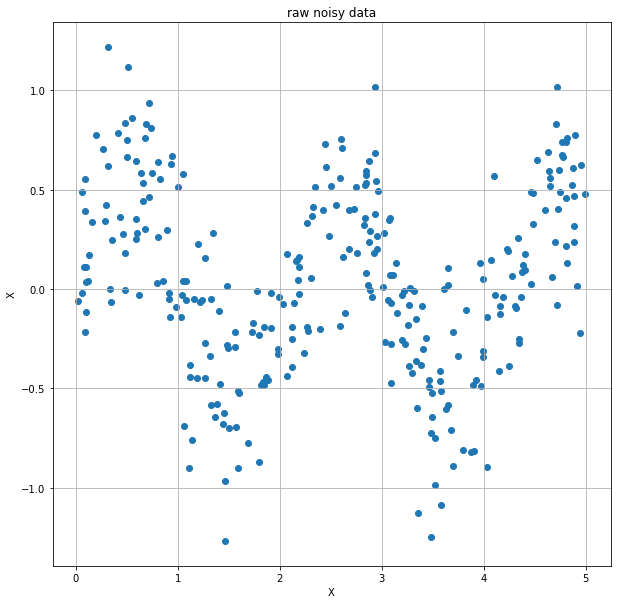

In [3]:
plt.figure(figsize=(10,10))
plt.scatter(X,y)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('X')
plt.title('raw noisy data')

### (b) Create a suitable kernel for the covariance function
The data shows a sin-like oscillation that is noisy. So it makes sense to select for the __oscillating part__ of the covariance either
1. the sin-exponential kernel
2. the RBF-kernel

For the __noisy part__, we could either choose a white noise kernel (WhiteKernel).
We start with the RBF-kernel and additive white noise.

In [3]:
# First run: using the RBF kernel and white noise
kernel = 1.0 * kernels.RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
    + kernels.WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))
gp1 = GaussianProcessRegressor(kernel=kernel, alpha=1e-5).fit(X, y)

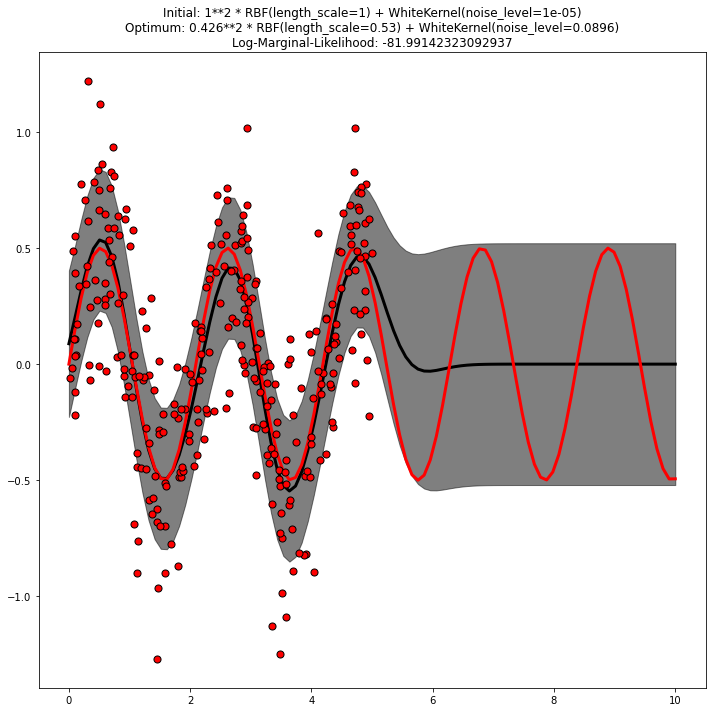

<Figure size 432x288 with 0 Axes>

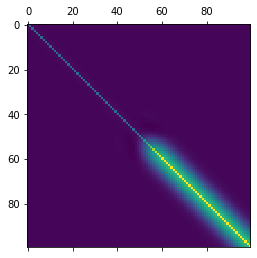

In [4]:
X_ = np.linspace(0, 10, 100)
y_mean, y_cov = gp1.predict(X_[:, np.newaxis], return_cov=True)

plt.figure(figsize=(10,10))
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k')
plt.plot(X_, 0.5*np.sin(3*X_), 'r', lw=3, zorder=9)
plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
          % (kernel, gp1.kernel_,
             gp1.log_marginal_likelihood(gp1.kernel_.theta)))
plt.tight_layout()
y_cov.shape

plt.figure()
plt.matshow(y_cov)
plt.show()


In [6]:
#Get out the hyperparameters
gp1.kernel_

0.426**2 * RBF(length_scale=0.53) + WhiteKernel(noise_level=0.0896)

### (c) using the ExpSineSquared kernel

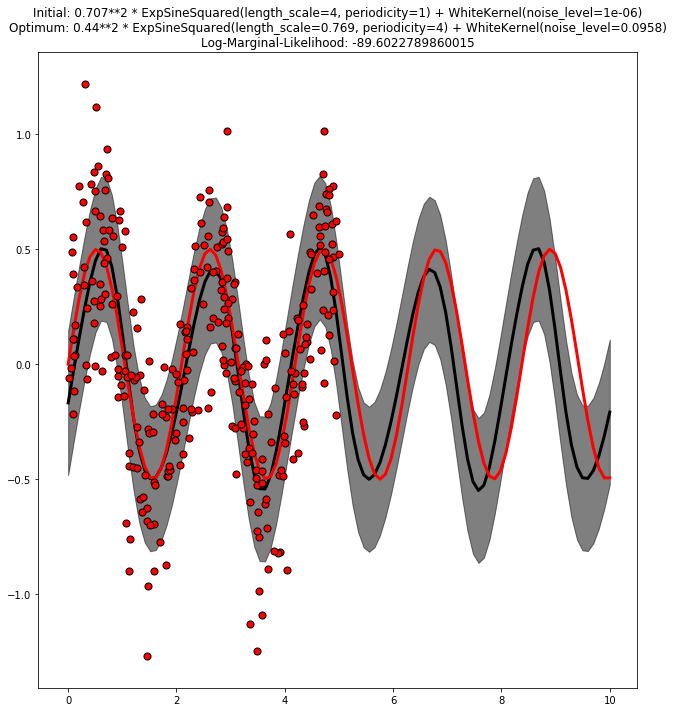

<Figure size 432x288 with 0 Axes>

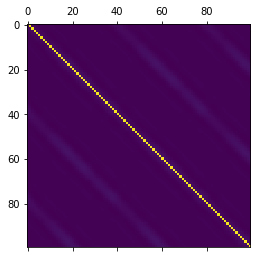

In [7]:
# Second run: using the sin-exponential kernel and white noise
kernel = 0.5 * kernels.ExpSineSquared(length_scale=4.0,  periodicity=1,
                                      length_scale_bounds=(1e-1, 1e3),
                                     periodicity_bounds=(1e-1, 4)) \
    + kernels.WhiteKernel(noise_level=1e-6, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel, alpha=1E-5).fit(X, y)

X_ = np.linspace(0, 10, 100)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)


plt.figure(figsize=(10,10))
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k')
plt.plot(X_, 0.5*np.sin(3*X_), 'r', lw=3, zorder=9)
plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
          % (kernel, gp.kernel_,
             gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()

plt.figure()
plt.matshow(y_cov)
plt.show()


In [8]:
#Get out the hyperparameters
gp.kernel_


0.44**2 * ExpSineSquared(length_scale=0.769, periodicity=4) + WhiteKernel(noise_level=0.0958)

### References

[1] Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>

